In [1]:
import tensorflow as tf
from tensorflow import keras
import datetime
import os
import random
import pandas as pd
import numpy as np
import pickle

In [2]:
from keras import metrics

from tensorflow.keras.layers import Dense, Concatenate, Add, Multiply
from tensorflow.keras import Input, Model

Using TensorFlow backend.


In [4]:
raw = pd.read_csv('./data/20210421_trainXs_y1_y2.csv', header=None)

In [5]:
raw.groupby(by=51).count()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
51,,,,,,,,,,,,,,,,,,,,,
1.0,4041,4041,4041,4041,4041,4041,4041,4041,4041,4041,...,4041,4041,4041,4041,4041,4041,4041,4041,4041,4041
2.0,1560,1560,1560,1560,1560,1560,1560,1560,1560,1560,...,1560,1560,1560,1560,1560,1560,1560,1560,1560,1560
3.0,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
4.0,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,...,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175
5.0,146,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,146,146,146,146
6.0,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
7.0,5204,5204,5204,5204,5204,5204,5204,5204,5204,5204,...,5204,5204,5204,5204,5204,5204,5204,5204,5204,5204
8.0,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
9.0,4436,4436,4436,4436,4436,4436,4436,4436,4436,4436,...,4436,4436,4436,4436,4436,4436,4436,4436,4436,4436


In [6]:
# Feature 개수
FTR_SIZE = 25

In [7]:
X1 = raw.iloc[:, :FTR_SIZE]
X2 = raw.iloc[:, FTR_SIZE:-2]
Y = raw.iloc[:, -2]
Z = raw.iloc[:, -1]

X1.shape, X2.shape, Y.shape, Z.shape

((100000, 25), (100000, 25), (100000,), (100000,))

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X1_train, X1_test, X2_train, X2_test, y_train, y_test, z_train, z_test = train_test_split(X1, X2, Y, Z, random_state=66, test_size=0.4)
X1_val, X1_test, X2_val, X2_test, y_val, y_test, z_val, z_test = train_test_split(X1_test, X2_test, y_test, z_test, random_state=66, test_size=0.4)



In [10]:
for item in [X1_train, X1_test, X2_train, X2_test, y_train, y_test, z_train, z_test]:
    print(item.shape)

(60000, 25)
(16000, 25)
(60000, 25)
(16000, 25)
(60000,)
(16000,)
(60000,)
(16000,)


In [11]:
z_train, z_val, z_test = z_train.astype(int), z_val.astype(int), z_test.astype(int)
z_train, z_val, z_test = z_train - 1, z_val - 1, z_test - 1

In [12]:
input_avg = Input(shape=(FTR_SIZE,), name='input_cardsvcs_avg')
input_max = Input(shape=(FTR_SIZE,), name='input_cardsvcs_max')

input_out1 = Dense(32, activation='relu', name='hid_avg')(input_avg)
input_out2 = Dense(32, activation='relu', name='hid_max')(input_max)

concat1 = Concatenate(axis=1)([input_out1, input_out2])
hidden3 = Dense(64, activation='relu', name='hid_concat1')(concat1)
hidden_out = Dense(32, activation='relu', name='hid_concat2')(hidden3)

output1 = Dense(1, name='cont_out')(hidden_out)  # 연회비
output2 = Dense(FTR_SIZE-1, activation='softmax', name='cat_out')(hidden_out)  # 서비스 개수

In [13]:
model = Model(inputs=[input_avg, input_max], outputs=[output1, output2])

model.compile(loss={'cont_out': 'mean_absolute_error', 
                    'cat_out': 'sparse_categorical_crossentropy'}, # softmax_cross_entropy_with_logits_v2
              optimizer='sgd',
              metrics={#'cont_out': metrics.mae,
                  'cat_out': 'sparse_categorical_accuracy'})

In [14]:
hist = model.fit([X1_train,X2_train], {'cont_out': y_train, 'cat_out': z_train},
                    validation_data=([X1_val, X2_val], {'cont_out': y_val, 'cat_out': z_val}),
                    epochs=100, batch_size=20)

Epoch 1/100
3000/3000 [==============================] - 4s 1ms/step - loss: 1.9560 - cont_out_loss: 0.1196 - cat_out_loss: 1.8364 - cat_out_sparse_categorical_accuracy: 0.4443 - val_loss: 1.4017 - val_cont_out_loss: 0.0965 - val_cat_out_loss: 1.3051 - val_cat_out_sparse_categorical_accuracy: 0.5789
Epoch 2/100
3000/3000 [==============================] - 4s 1ms/step - loss: 1.2594 - cont_out_loss: 0.1264 - cat_out_loss: 1.1330 - cat_out_sparse_categorical_accuracy: 0.6202 - val_loss: 1.1260 - val_cont_out_loss: 0.1222 - val_cat_out_loss: 1.0038 - val_cat_out_sparse_categorical_accuracy: 0.6593
Epoch 3/100
3000/3000 [==============================] - 4s 1ms/step - loss: 1.0601 - cont_out_loss: 0.1190 - cat_out_loss: 0.9411 - cat_out_sparse_categorical_accuracy: 0.6714 - val_loss: 0.9897 - val_cont_out_loss: 0.1120 - val_cat_out_loss: 0.8777 - val_cat_out_sparse_categorical_accuracy: 0.6799
Epoch 4/100
3000/3000 [==============================] - 4s 1ms/step - loss: 0.9556 - cont_out_lo

3000/3000 [==============================] - 4s 1ms/step - loss: 0.5583 - cont_out_loss: 0.0594 - cat_out_loss: 0.4988 - cat_out_sparse_categorical_accuracy: 0.8248 - val_loss: 0.5494 - val_cont_out_loss: 0.0385 - val_cat_out_loss: 0.5109 - val_cat_out_sparse_categorical_accuracy: 0.8179
Epoch 29/100
3000/3000 [==============================] - 4s 1ms/step - loss: 0.5542 - cont_out_loss: 0.0585 - cat_out_loss: 0.4956 - cat_out_sparse_categorical_accuracy: 0.8248 - val_loss: 0.5623 - val_cont_out_loss: 0.0553 - val_cat_out_loss: 0.5070 - val_cat_out_sparse_categorical_accuracy: 0.8190
Epoch 30/100
3000/3000 [==============================] - 4s 1ms/step - loss: 0.5508 - cont_out_loss: 0.0580 - cat_out_loss: 0.4928 - cat_out_sparse_categorical_accuracy: 0.8258 - val_loss: 0.5385 - val_cont_out_loss: 0.0326 - val_cat_out_loss: 0.5059 - val_cat_out_sparse_categorical_accuracy: 0.8175
Epoch 31/100
3000/3000 [==============================] - 4s 1ms/step - loss: 0.5460 - cont_out_loss: 0.057

3000/3000 [==============================] - 4s 1ms/step - loss: 0.4797 - cont_out_loss: 0.0489 - cat_out_loss: 0.4308 - cat_out_sparse_categorical_accuracy: 0.8485 - val_loss: 0.4923 - val_cont_out_loss: 0.0370 - val_cat_out_loss: 0.4553 - val_cat_out_sparse_categorical_accuracy: 0.8401
Epoch 56/100
3000/3000 [==============================] - 4s 1ms/step - loss: 0.4770 - cont_out_loss: 0.0481 - cat_out_loss: 0.4290 - cat_out_sparse_categorical_accuracy: 0.8491 - val_loss: 0.5119 - val_cont_out_loss: 0.0333 - val_cat_out_loss: 0.4786 - val_cat_out_sparse_categorical_accuracy: 0.8295
Epoch 57/100
3000/3000 [==============================] - 4s 1ms/step - loss: 0.4742 - cont_out_loss: 0.0479 - cat_out_loss: 0.4263 - cat_out_sparse_categorical_accuracy: 0.8499 - val_loss: 0.5058 - val_cont_out_loss: 0.0458 - val_cat_out_loss: 0.4600 - val_cat_out_sparse_categorical_accuracy: 0.8379
Epoch 58/100
3000/3000 [==============================] - 4s 1ms/step - loss: 0.4727 - cont_out_loss: 0.047

3000/3000 [==============================] - 4s 1ms/step - loss: 0.4355 - cont_out_loss: 0.0443 - cat_out_loss: 0.3912 - cat_out_sparse_categorical_accuracy: 0.8611 - val_loss: 0.4663 - val_cont_out_loss: 0.0297 - val_cat_out_loss: 0.4367 - val_cat_out_sparse_categorical_accuracy: 0.8446
Epoch 83/100
3000/3000 [==============================] - 4s 1ms/step - loss: 0.4329 - cont_out_loss: 0.0440 - cat_out_loss: 0.3889 - cat_out_sparse_categorical_accuracy: 0.8623 - val_loss: 0.5021 - val_cont_out_loss: 0.0626 - val_cat_out_loss: 0.4395 - val_cat_out_sparse_categorical_accuracy: 0.8440
Epoch 84/100
3000/3000 [==============================] - 4s 1ms/step - loss: 0.4328 - cont_out_loss: 0.0442 - cat_out_loss: 0.3887 - cat_out_sparse_categorical_accuracy: 0.8618 - val_loss: 0.4764 - val_cont_out_loss: 0.0323 - val_cat_out_loss: 0.4441 - val_cat_out_sparse_categorical_accuracy: 0.8434
Epoch 85/100
3000/3000 [==============================] - 4s 1ms/step - loss: 0.4304 - cont_out_loss: 0.043

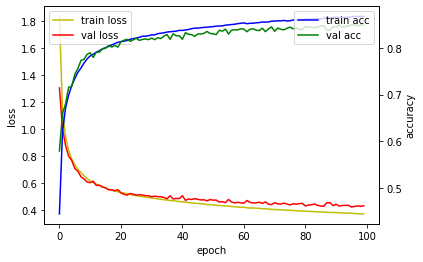

In [15]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

# 카드 서비스 카테고리 맞추는 게 더 중요 : 일단 이것만 보자
loss_ax.plot(hist.history['cat_out_loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_cat_out_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['cat_out_sparse_categorical_accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_cat_out_sparse_categorical_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

In [16]:
model.save('./data/20210427.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./data/20210427.model/assets


In [17]:
del model

In [18]:
model = keras.models.load_model('./data/20210427.model')

## Online test

In [19]:
# cosine similarity
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [20]:
card_df = pd.read_csv('./data/20210421_card_meta_features_normalized.csv') #, index=False)
card_df = card_df.set_index('상품번호')

# 모델 입력용 array
ftr_array = card_df.to_numpy()
ftrs = {x:ftr_array[idx] for idx, x in enumerate(card_df.index)}

In [21]:
# 서비스이름 참조용
svc_dict = {idx:svc for idx, svc in enumerate(card_df.columns[1:])}

In [22]:
# 카드이름 참조용
name_dict = pickle.load(open('./data/20210420_cardname_dict.pkl', 'rb'))

In [25]:
# 상품명을 보고 아래와 같이 구분할 수 잇도록
skypass = {'AFJAPT', 'ALMA1V', 'ALNA7M', 'ALPAPE', 'ALRB01', 'ALSB7E', 'ALWBPA', 'BFBBQ0'}
asiana = {'AFJAPU', 'ALNA7N', 'ALPAPF', 'ALRB02', 'ALSB7F', 'ALWBPB', 'BFAB8J'}

In [26]:
%%time
n_sel = 3 #np.random.randint(6)
if n_sel > 0:
    sel_ids = card_df.sample(n_sel).index
    sel_ftrs = [ftrs.get(i) for i in sel_ids]
    X1, X2 = np.mean(sel_ftrs, axis=0), np.max(sel_ftrs, axis=0)
    print(X1, X2)
else:
    sel_ids = []
    X1, X2 = np.array([0]*24), np.array([0]*24)
sel_names = [name_dict.get(i) for i in sel_ids]
pred = model.predict([pd.DataFrame(X1).T, pd.DataFrame(X2).T])
A = np.concatenate((pred[0][0], pred[1][0]))
print('SELECTED', sel_names)
print('SEL AIRS', ['아시아나' if x in asiana else '대한항공' if x in skypass else '' for x in sel_ids])
print('SVC IDS', svc_dict.get(np.argmax(X1)), svc_dict.get(np.argmax(X2)))
ret = []
for B in ftrs:
    if B not in sel_ids:
        ret.append([B, name_dict.get(B), cos_sim(A, ftrs.get(B))])
ret = pd.DataFrame(ret, columns=['id', 'name', 'score']).sort_values(by='score', ascending=False)
ret['항공구분'] = ret['id'].map(lambda x: '아시아나' if x in asiana else '대한항공' if x in skypass else '')
ret.head(10)

[2.99603631e-04 5.69515870e-02 2.36959776e-01 2.80429779e-01
 4.62996051e-01 3.35398568e-01 1.74528549e-01 6.67203325e-02
 7.08086774e-02 4.88725118e-02 6.73137016e-01 4.51237180e-01
 4.03812741e-01 6.25758895e-01 6.37048468e-02 1.92089492e-01
 4.83541337e-02 5.51792438e-02 4.98093949e-02 4.91889575e-02
 3.62287919e-01 5.50650473e-02 3.61285569e-01 1.58450755e-01
 5.00000000e-01] [5.92097150e-04 7.60952802e-02 6.14794230e-01 4.73296808e-01
 7.93514311e-01 4.75420618e-01 4.61453614e-01 8.89897575e-02
 9.44426803e-02 6.51848216e-02 7.82682431e-01 6.34867404e-01
 4.91161885e-01 9.69085179e-01 8.49677849e-02 5.65293460e-01
 6.44934230e-02 7.35965684e-02 7.47343158e-02 6.56068882e-02
 9.89186307e-01 7.34442564e-02 8.46428135e-01 2.23277314e-01
 5.00000000e-01]
SELECTED ['신한카드 Deep Store', '신한카드 D-day', '신한카드 Love Platinum#']
SEL AIRS ['', '', '']
SVC IDS 요식 호텔/숙박
CPU times: user 162 ms, sys: 6.1 ms, total: 168 ms
Wall time: 280 ms


,id,name,score,항공구분
1,AFJAPT,신한카드 Air Platinum#,0.559310,대한항공
28,AVAATJ,신한카드 YOLO Tasty,0.551621,
46,AYAAZF,신한카드 YOLO ⓘ,0.548853,
23,AXAAZE,신한카드 O2O,0.536352,
33,ALMA1V,신한카드 The BEST-F,0.499971,대한항공
2,AFJAPU,신한카드 Air Platinum#,0.494560,아시아나
34,ALMA1U,신한카드 The BEST-F,0.483240,
24,AZAAZW,신한카드 RPM+ Platinum#,0.461091,
10,BLABSJ,신한카드 Deep Making,0.283719,
14,BLBBSK,신한카드 Deep Taking,0.283717,


## Model Test

In [221]:
data = [
    {'cards': ["BOACF4", "BOAC6A", "BNBC47", "AXAAZE", "BPAC88"], 'actions': [0, 0, 0, 1, 0]},
{'cards': ["BECB97", "BOAC6A", "BNBC47", "AXAAZE", "BPAC88"], 'actions': [1, 0, 0, 0, 0]},
{'cards': ["AXDBMR", "BOAC6A", "BCBBLO", "AZAAZW", "AXAAZE"], 'actions': [0, 0, 0, 1, 0]}
]

In [224]:
RANK_TO_SERVE = 5

In [228]:
ftr_ids

NameError: name 'ftr_ids' is not defined

In [232]:
def cos_sim(X=[]):
    A, B = X
    return np.matmul(A, B.T)/(norm(A)*norm(B, axis=1))
    #args = np.argsort(mat)[-rank:]
    #return mat[args], ftr_ids[args]

    
def make_prediction_merge_3_results(data):
    ret = []
    for actions in data:
        #tmp = actions['cards'] * 
        input = [ftrs.get(actions['cards'][idx[0]]) for idx in np.argwhere(actions['actions'])]
        X1, X2 = np.mean(input, axis=0), np.max(input, axis=0)
        pred = model.predict([pd.DataFrame(X1).T, pd.DataFrame(X2).T])
        A = np.concatenate(pred, axis=1)[0]
        mat = cos_sim([A, ftr_array])
        args = np.argsort(mat)[-RANK_TO_SERVE:]
        ret.append([mat[args], ftr_ids[args]])
    _score, _ids = np.concatenate(ret, axis=1)
    recom = []
    for idx in reversed(np.argsort(_score)):
        if _ids[idx] in recom: continue
        recom.append(_ids[idx])
        if len(recom) == 5: break
    return recom

In [233]:
make_prediction_merge_3_results(data)

['BFAB8J', 'BA7AQ7', 'BECB97', 'AVAATJ', 'AYAAZF']

In [162]:
from numpy.linalg import norm
def cos_sim(X=[], rank=5):
    A, B = X
    mat = np.matmul(A, B.T)/(norm(A)*norm(B, axis=1))
    args = np.argsort(mat)[-rank:]
    return mat[args], cids[args]
    

In [229]:
ftr_ids = np.array(list(ftrs.keys()))

In [163]:
cos_sim([A, ftr_array], rank=5)

(array([0.50294624, 0.51197379, 0.53540871, 0.53602806, 0.59256905]),
 array(['ALSB7F', 'ALNA7N', 'ALWBPB', 'ALRB02', 'BFAB8J'], dtype='<U6'))

In [169]:
rec1 = cos_sim([A, ftr_array], rank=5)

In [171]:
rec2 = cos_sim([A, ftr_array], rank=5)

In [190]:
_score, _ids = np.concatenate([rec1, rec2], axis=1)

In [219]:
recom = []
for idx in reversed(np.argsort(_score)):
    if _ids[idx] in recom: continue
    recom.append(_ids[idx])
    if len(recom) == 5: break

In [220]:
recom

['BA7A3X', 'ALZCCY', 'ALSB7F', 'BOAC6A', 'ALSB7E']

In [218]:
set(_ids[np.argsort(_score)[-5:]])

{'ALSB7E', 'ALSB7F', 'ALZCCY', 'BA7A3X', 'BOAC6A'}

In [136]:
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [140]:
for B in ftrs:
    print(cos_sim(A, ftrs.get(B)))

0.003080075253058428
0.008230530134489017
0.4733445185303833
0.5925690513903296
0.27880390704162045
0.2743271380183205
0.32707535725183895
0.3177190095506084
0.30100340040480766
0.2704806325940677
0.274531871926937
0.3193842289821952
0.26444724591085733
0.3156603025188148
0.3657842778005116
0.2798789277780118
0.3193795465513295
0.3468649151636613
0.35223482781224935
0.27177187991705093
0.31658167325536557
0.3717744277581451
0.2693745443176762
0.33901404447151817
0.3089729023751842
0.356194319068925
0.2749652169907308
0.27384954274461215
0.2619725075000436
0.3516333541598955
0.29276552035022185
0.2744165119225144
0.040260439137780525
0.5029462427680799
0.00973244750088741
0.5354087134497282
0.009668626383311637
0.2651623373409527
0.002783996275726132
0.5360280588926102
0.0043083823080378595
0.4497296134549152
0.008075085390730678
0.5119737932728596
0.2886612289362047
0.3458818912015659
0.37034552862376185
0.31586733859389904
0.30927539984173885
0.27963244953021726
0.35223482781224935
0.

In [139]:
B

'BFBBQ0'

In [95]:
norm([ftrs.get(x) for x in ftrs], axis=1)

array([1.36375215, 1.89323434, 2.14110632, 1.69110019, 1.80123339,
       1.83040484, 1.53535207, 1.58272282, 1.66543869, 1.84974442,
       1.87992646, 1.56922567, 1.89731033, 1.58890159, 1.37475515,
       1.79189661, 1.56922565, 1.44837422, 1.42576257, 1.90455518,
       1.59289469, 1.35403363, 1.915339  , 1.48213121, 1.62215268,
       1.41324351, 1.82370699, 1.84076914, 1.93610032, 1.43120638,
       1.71633156, 1.82894418, 1.88645619, 2.13511521, 1.60734031,
       1.8930248 , 1.88485673, 1.95004215, 1.57999228, 1.86985978,
       2.00221042, 2.2380451 , 1.7042831 , 1.97600123, 1.77611373,
       1.45359077, 1.36054105, 1.59777519, 1.62353858, 1.79477486,
       1.42576257, 1.77298547, 1.59239085, 1.59239085, 1.53172345,
       1.90297381, 1.54894742, 1.72719217, 1.87335279, 1.62626348])

In [79]:
ret = []
for actions in data:
    #tmp = actions['cards'] * 
    input = [ftrs.get(actions['cards'][idx[0]]) for idx in np.argwhere(actions['actions'])]
    X1, X2 = np.mean(input, axis=0), np.max(input, axis=0)
    pred = model.predict([pd.DataFrame(X1).T, pd.DataFrame(X2).T])
    A = np.concatenate(pred, axis=1)[0]
    for B in ftrs:
        ret.append([B, cos_sim(A, ftrs.get(B))])
pd.DataFrame(ret, columns=['id', 'score']).sort_values(by='score', ascending=False).groupby(by='id').first().sort_values(by='score', ascending=False)

,score
id,
BFAB8J,0.592569
BA7AQ7,0.585944
BECB97,0.551590
AVAATJ,0.546737
AYAAZF,0.544018
BCBBLO,0.541107
ALRB02,0.536028
ALWBPB,0.535409
AXAAZE,0.532508


In [71]:
A

array([4.01809402e-02, 3.08656674e-08, 1.48526489e-08, 1.09290006e-07,
       8.99158069e-04, 4.28418900e-07, 4.39814798e-08, 1.84040971e-07,
       1.84111268e-08, 3.11524627e-06, 1.95840003e-05, 1.68958138e-07,
       3.96354594e-09, 9.94396448e-01, 5.21828724e-07, 1.26981661e-07,
       6.82276095e-07, 2.71059753e-06, 5.52937036e-06, 5.05811606e-08,
       6.00921112e-06, 1.24004248e-06, 4.58224630e-03, 1.41440069e-06,
       8.02434879e-05], dtype=float32)

In [72]:
for B in ftrs:
    print(B)
    break

BFBBQ0


In [67]:
np.concatenate(pred, axis=1)

array([[4.01809402e-02, 3.08656674e-08, 1.48526489e-08, 1.09290006e-07,
        8.99158069e-04, 4.28418900e-07, 4.39814798e-08, 1.84040971e-07,
        1.84111268e-08, 3.11524627e-06, 1.95840003e-05, 1.68958138e-07,
        3.96354594e-09, 9.94396448e-01, 5.21828724e-07, 1.26981661e-07,
        6.82276095e-07, 2.71059753e-06, 5.52937036e-06, 5.05811606e-08,
        6.00921112e-06, 1.24004248e-06, 4.58224630e-03, 1.41440069e-06,
        8.02434879e-05]], dtype=float32)

In [68]:
pred

[array([[0.04018094]], dtype=float32),
 array([[3.08656674e-08, 1.48526489e-08, 1.09290006e-07, 8.99158069e-04,
         4.28418900e-07, 4.39814798e-08, 1.84040971e-07, 1.84111268e-08,
         3.11524627e-06, 1.95840003e-05, 1.68958138e-07, 3.96354594e-09,
         9.94396448e-01, 5.21828724e-07, 1.26981661e-07, 6.82276095e-07,
         2.71059753e-06, 5.52937036e-06, 5.05811606e-08, 6.00921112e-06,
         1.24004248e-06, 4.58224630e-03, 1.41440069e-06, 8.02434879e-05]],
       dtype=float32)]